<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.1: Feature Selection I

### 1. Load & Explore Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 1.1 Load Data

In [2]:
# Read CSV
wine_csv = 'winequality_merged.csv'

wine = pd.read_csv(wine_csv)

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


#### 1.2 Explore Data (Exploratory Data Analysis)

In [3]:
# ANSWER

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


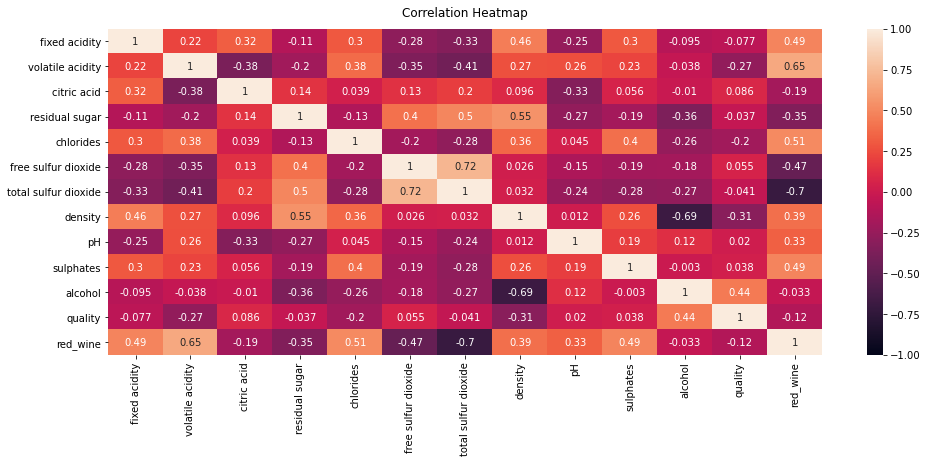

In [5]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to 
# include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, 
# and set the annotation to True to display the correlation values on the heatmap.

heatmap = sns.heatmap(wine.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

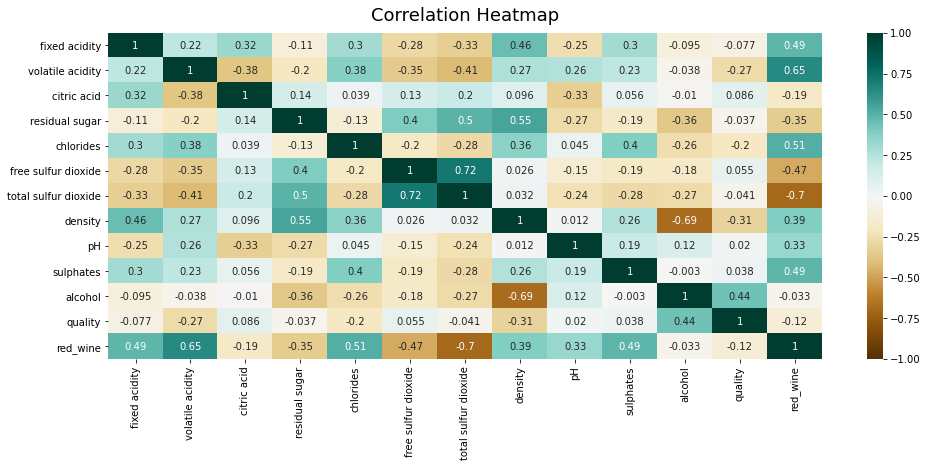

In [6]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(wine.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped

plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [7]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'red_wine'],
      dtype='object')

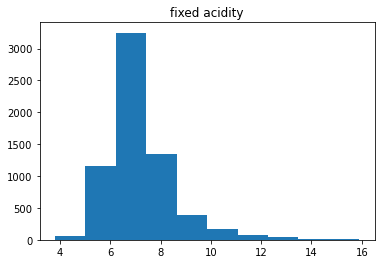

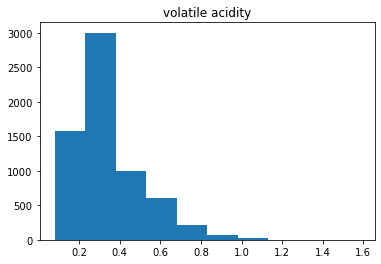

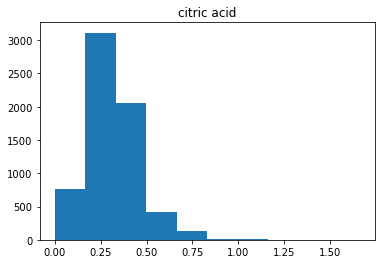

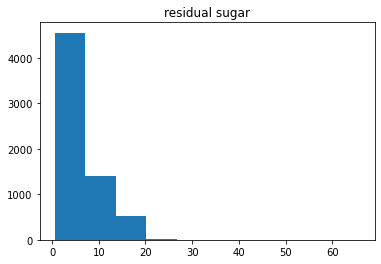

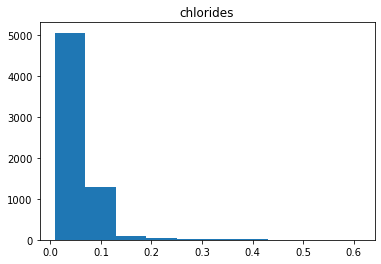

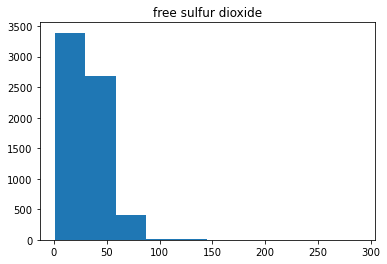

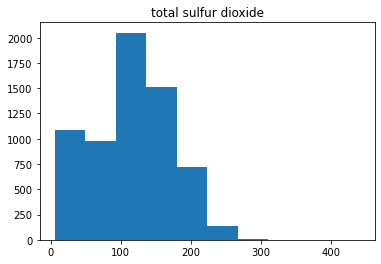

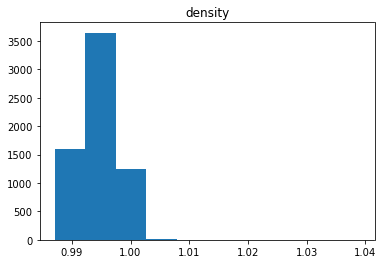

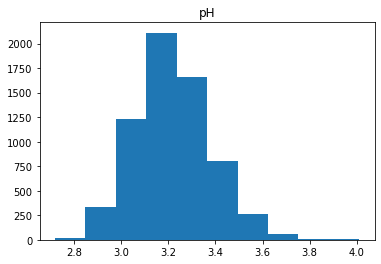

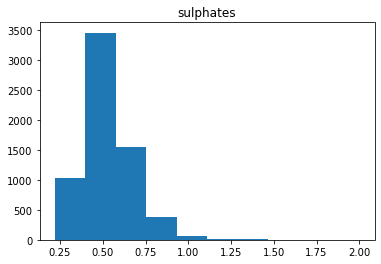

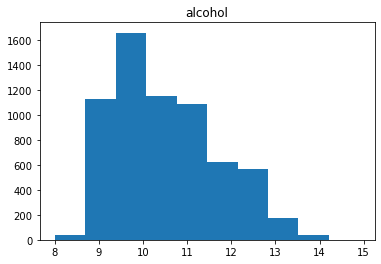

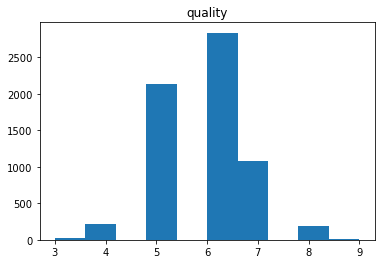

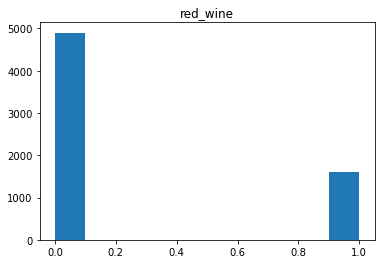

In [8]:
for colname in wine.columns:
    plt.hist(x=colname,data=wine)
    plt.title(colname)
    plt.show()

### 2. Set Target Variable

Create a target variable for wine quality.

In [9]:
# Check correlation
wine.corr()['quality'].sort_values()

density                -0.305858
volatile acidity       -0.265699
chlorides              -0.200666
red_wine               -0.119323
fixed acidity          -0.076743
total sulfur dioxide   -0.041385
residual sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free sulfur dioxide     0.055463
citric acid             0.085532
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64

In [10]:
# I chose the feature which are strogly correalted with quality
predictor_columns = ['density', 'volatile acidity', 'chlorides', 'alcohol']

In [11]:
# Target Variable

wine[['quality']]

,quality
0,5
1,5
2,5
3,6
4,5
...,...
6492,6
6493,5
6494,6
6495,7


In [12]:
X = wine[predictor_columns]
X.head()

,density,volatile acidity,chlorides,alcohol
0,0.9978,0.70,0.076,9.4
1,0.9968,0.88,0.098,9.8
2,0.9970,0.76,0.092,9.8
3,0.9980,0.28,0.075,9.8
4,0.9978,0.70,0.076,9.4


### 3. Set Predictor Variables

Create a predictor matrix with variables of your choice. State your reason.

In [13]:
# ANSWER

#alcohol - has the highest positive correlation with quality
#density - has the highest negative correlatioin with quality

In [14]:
df = wine.drop(['red_wine','quality'],1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


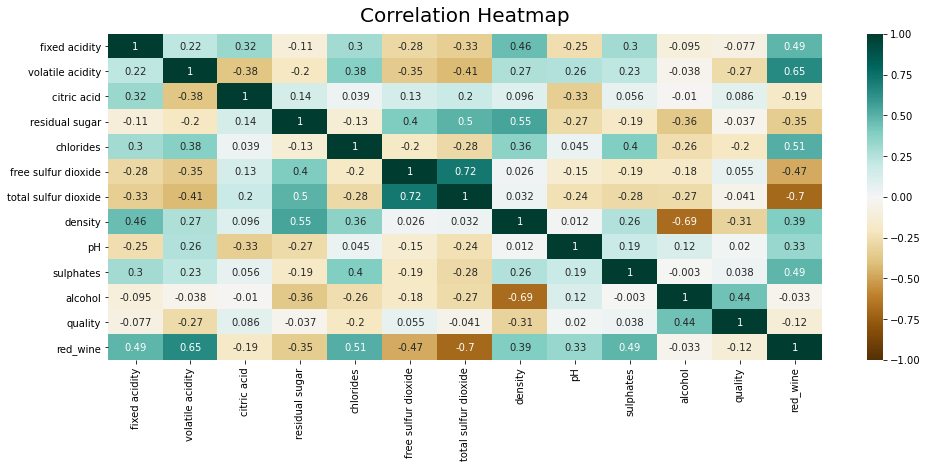

In [15]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(wine.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);


In [16]:
df2 = df.drop(['fixed acidity','volatile acidity','residual sugar','chlorides','total sulfur dioxide','density','sulphates'],1)
df2.head()

,citric acid,free sulfur dioxide,pH,alcohol
0,0.00,11.0,3.51,9.4
1,0.00,25.0,3.20,9.8
2,0.04,15.0,3.26,9.8
3,0.56,17.0,3.16,9.8
4,0.00,11.0,3.51,9.4


<AxesSubplot:xlabel='quality', ylabel='citric acid'>

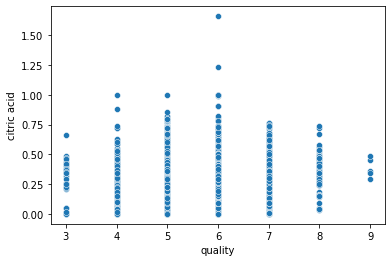

In [17]:
sns.scatterplot(x='quality',y='citric acid',data=wine)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

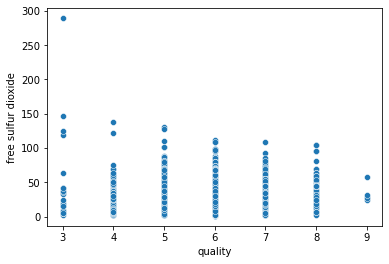

In [18]:
sns.scatterplot(x='quality',y='free sulfur dioxide',data=wine)

<AxesSubplot:xlabel='quality', ylabel='pH'>

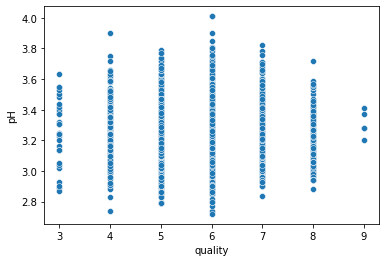

In [19]:
sns.scatterplot(x='quality',y='pH',data=wine)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

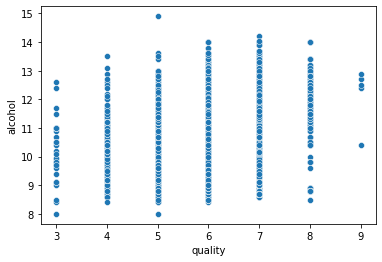

In [20]:
sns.scatterplot(x='quality',y='alcohol',data=wine)

In [21]:
df3 = df.drop(['fixed acidity','volatile acidity','residual sugar','chlorides','total sulfur dioxide','pH','sulphates','citric acid','free sulfur dioxide'],1)
df3.head()


,density,alcohol
0,0.9978,9.4
1,0.9968,9.8
2,0.9970,9.8
3,0.9980,9.8
4,0.9978,9.4


In [22]:
df4 = df.drop(['fixed acidity','residual sugar','chlorides','total sulfur dioxide','pH','sulphates','citric acid','free sulfur dioxide'],1)
df4.head()

,volatile acidity,density,alcohol
0,0.70,0.9978,9.4
1,0.88,0.9968,9.8
2,0.76,0.9970,9.8
3,0.28,0.9980,9.8
4,0.70,0.9978,9.4


In [23]:
df6 = wine.drop(['quality','free sulfur dioxide','total sulfur dioxide','citric acid','chlorides'],1)
df6.head()

#alcohol, volatile acidity, sulphates, residual sugar, red_wine, density, pH, fixed acidity

,fixed acidity,volatile acidity,residual sugar,density,pH,sulphates,alcohol,red_wine
0,7.4,0.70,1.9,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,2.6,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,2.3,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,1.9,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,1.9,0.9978,3.51,0.56,9.4,1


### 4. Using Linear Regression Create a Model and Test Score

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [25]:
# Train-Test Split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [26]:
# Create a model for Linear Regression

# Fit the model with the Training data

# Calculate the score (R^2 for Regression) for Training Data

# Calculate the score (R^2 for Regression) for Testing Data

In [27]:
X = df #taking all columns as predictors
y = wine['quality']

# Create a model for Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


# Fit the model with the Training data
reg = LinearRegression().fit(X_train, y_train)

# Calculate the score (R^2 for Regression) for Training Data
print('(R^2 for Regression) for Training Data:', reg.score(X_train, y_train))

# Calculate the score (R^2 for Regression) for Testing Data
print('(R^2 for Regression) for Testing Data:', reg.score(X_test, y_test))

#rmse and r2_score

pred = reg.predict(X_test)
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

test_set_r2 = r2_score(y_test, pred)

print('Root mean square error:', test_set_rmse) # Note that for rmse, the lower that value is, the better the fit
print('R2_score:', test_set_r2) # The closer towards 1, the better the fit


(R^2 for Regression) for Training Data: 0.29925235604870537
(R^2 for Regression) for Testing Data: 0.2597673129789997
Root mean square error: 0.7393892357602122
R2_score: 0.2597673129789997


In [28]:
X = df2 #taking citric acid	free sulfur dioxide	pH	alcohol as predictors
y = wine['quality']

# Create a model for Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


# Fit the model with the Training data
reg = LinearRegression().fit(X_train, y_train)

# Calculate the score (R^2 for Regression) for Training Data
print('(R^2 for Regression) for Training Data:', reg.score(X_train, y_train))

# Calculate the score (R^2 for Regression) for Testing Data
print('(R^2 for Regression) for Testing Data:', reg.score(X_test, y_test))

#rmse and r2_score

pred = reg.predict(X_test)
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

test_set_r2 = r2_score(y_test, pred)

print('Root mean square error:', test_set_rmse) # Note that for rmse, the lower that value is, the better the fit
print('R2_score:', test_set_r2) # The closer towards 1, the better the fit

(R^2 for Regression) for Training Data: 0.22717655964239447
(R^2 for Regression) for Testing Data: 0.19739576002570924
Root mean square error: 0.7699095722274009
R2_score: 0.19739576002570924


In [29]:
X = df3 #taking density	alcohol as predictors
y = wine['quality']

# Create a model for Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


# Fit the model with the Training data
reg = LinearRegression().fit(X_train, y_train)

# Calculate the score (R^2 for Regression) for Training Data
print('(R^2 for Regression) for Training Data:', reg.score(X_train, y_train))

# Calculate the score (R^2 for Regression) for Testing Data
print('(R^2 for Regression) for Testing Data:', reg.score(X_test, y_test))

#rmse and r2_score

pred = reg.predict(X_test)
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

test_set_r2 = r2_score(y_test, pred)

print('Root mean square error:', test_set_rmse) # Note that for rmse, the lower that value is, the better the fit
print('R2_score:', test_set_r2) # The closer towards 1, the better the fit

(R^2 for Regression) for Training Data: 0.20113535814114647
(R^2 for Regression) for Testing Data: 0.18115070970186709
Root mean square error: 0.7776621878782239
R2_score: 0.18115070970186709


In [30]:
X = df4 #taking volatile acidity,density,alcohol as predictors
y = wine['quality']

# Create a model for Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


# Fit the model with the Training data
reg = LinearRegression().fit(X_train, y_train)

# Calculate the score (R^2 for Regression) for Training Data
print('(R^2 for Regression) for Training Data:', reg.score(X_train, y_train))

# Calculate the score (R^2 for Regression) for Testing Data
print('(R^2 for Regression) for Testing Data:', reg.score(X_test, y_test))

#rmse and r2_score

pred = reg.predict(X_test)
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

test_set_r2 = r2_score(y_test, pred)

print('Root mean square error:', test_set_rmse) # Note that for rmse, the lower that value is, the better the fit
print('R2_score:', test_set_r2) # The closer towards 1, the better the fit

(R^2 for Regression) for Training Data: 0.2707802667639315
(R^2 for Regression) for Testing Data: 0.25196677083040697
Root mean square error: 0.743274852914811
R2_score: 0.25196677083040697


In [31]:
X = df6 #taking volatile acidity,density,alcohol as predictors
y = wine['quality']

# Create a model for Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


# Fit the model with the Training data
reg = LinearRegression().fit(X_train, y_train)

# Calculate the score (R^2 for Regression) for Training Data
print('(R^2 for Regression) for Training Data:', reg.score(X_train, y_train))

# Calculate the score (R^2 for Regression) for Testing Data
print('(R^2 for Regression) for Testing Data:', reg.score(X_test, y_test))

#rmse and r2_score

pred = reg.predict(X_test)
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

test_set_r2 = r2_score(y_test, pred)

print('Root mean square error:', test_set_rmse) # Note that for rmse, the lower that value is, the better the fit
print('R2_score:', test_set_r2) # The closer towards 1, the better the fit

(R^2 for Regression) for Training Data: 0.29616638532447714
(R^2 for Regression) for Testing Data: 0.26978769487798326
Root mean square error: 0.7343677018478458
R2_score: 0.26978769487798326


### BONUS: Cross validation

In [32]:
# Cross validation 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error

In [34]:
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

k_fold.split(X)

<generator object _BaseKFold.split at 0x00000230EF03DE40>

In [35]:
type(k_fold.split(X))

generator

In [36]:
k_fold.get_n_splits(X)

5

In [37]:
for train_index, test_index in k_fold.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [   0    1    2 ... 6491 6492 6496] TEST: [   7   10   11 ... 6493 6494 6495]
TRAIN: [   0    2    3 ... 6493 6494 6495] TEST: [   1    5   17 ... 6483 6490 6496]
TRAIN: [   0    1    2 ... 6494 6495 6496] TEST: [   4    8    9 ... 6481 6484 6488]
TRAIN: [   0    1    4 ... 6494 6495 6496] TEST: [   2    3    6 ... 6485 6491 6492]
TRAIN: [   1    2    3 ... 6494 6495 6496] TEST: [   0   12   13 ... 6472 6474 6478]


In [39]:
# Set up 5-fold cross validation  
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    
    # Get training and test sets for X and y
    X_train = X.iloc[train, ]
    y_train = y.iloc[train, ]
    X_test = X.iloc[test, ]
    y_test = y.iloc[test, ]
    
    # Fit model with training set
    reg.fit(X_train, y_train)
    
    # Make predictions with training and test set
    train_preds = reg.predict(X_train)
    test_preds = reg.predict(X_test)
    
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(reg.score(X_train, y_train))
    test_scores.append(reg.score(X_test, y_test))
    
    train_rmse.append(mean_squared_error(y_train, train_preds, squared=False))
    test_rmse.append(mean_squared_error(y_test, test_preds, squared=False))

# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df = pd.DataFrame({'Training R2': train_scores, 
                           'Test R2': test_scores, 
                           'Training RMSE': train_rmse, 
                           'Test RMSE': test_rmse},
                          index=[i+1 for i in range(5)])

metrics_df

,Training R2,Test R2,Training RMSE,Test RMSE
1,0.284022,0.322502,0.745839,0.690697
2,0.293929,0.280234,0.726784,0.767883
3,0.286769,0.306022,0.737224,0.727173
4,0.299736,0.255566,0.733078,0.743299
5,0.293392,0.280500,0.731648,0.749855


In [40]:
metrics_df.describe()

,Training R2,Test R2,Training RMSE,Test RMSE
count,5.000000,5.000000,5.000000,5.000000
mean,0.291570,0.288965,0.734915,0.735781
std,0.006237,0.025880,0.007156,0.029119
min,0.284022,0.255566,0.726784,0.690697
25%,0.286769,0.280234,0.731648,0.727173
50%,0.293392,0.280500,0.733078,0.743299
75%,0.293929,0.306022,0.737224,0.749855
max,0.299736,0.322502,0.745839,0.767883


### 5. Feature Selection

What's your score (R^2 for Regression) for Testing Data? 

How many feature have you selected? Can you improve your score by selecting different features?

**Please continue with Lab 4.2.2 with the same dataset.**



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



